In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [298]:
df.shape

(7043, 21)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


totalChanges lists as object(String) instead of a number,

In [300]:
df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NaN values but is some error. let's fix it

In [301]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].dtype

dtype('float64')

In [302]:
df.isnull().sum()   

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now we can detect dome missing values.

In [303]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


since "tenure" == 0 ,means they are new customers. so we can fill empty values from "0".

In [304]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(0)
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now all the missing values are handled.

# Churn correlation check

In [305]:
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df["Churn_Binary"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Binary, Length: 7043, dtype: int64

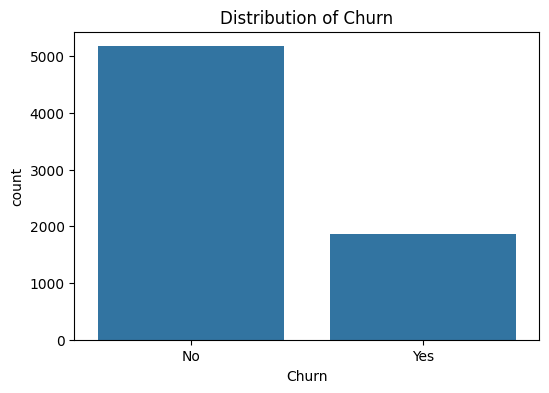

In [306]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

In [307]:

counts = df['Churn'].value_counts()
imbalance_df = pd.concat([counts,])
imbalance_df


Churn
No     5174
Yes    1869
Name: count, dtype: int64

we can see "No" have sightly big ratio (nealy 3x) than "Yes".

# Numerical distribution of "tenure" and "MonthlyCharges"

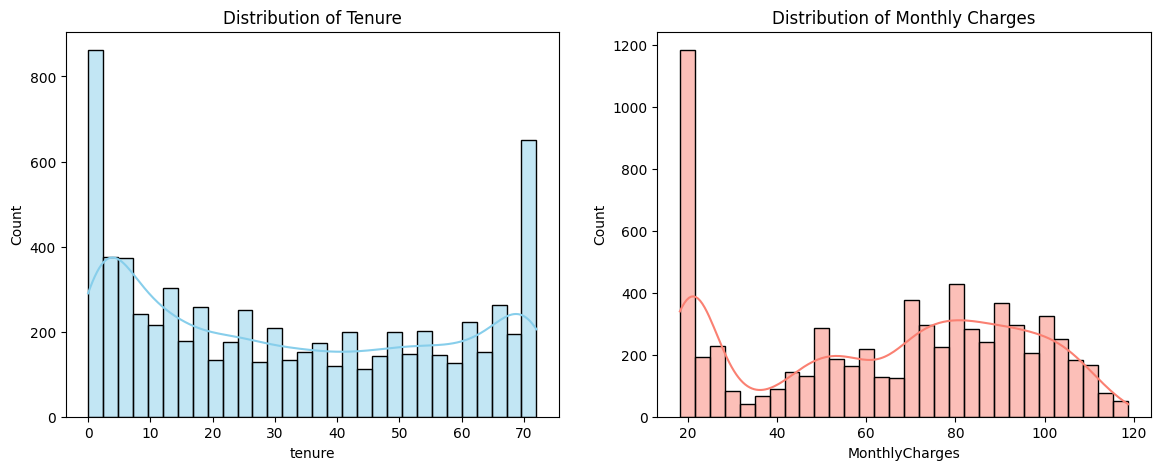

In [308]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['tenure'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Tenure')
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Monthly Charges')
plt.show()

Tenure: has two peaks. A huge spike at 0-5 months (new customers) and another spike at 70+ months (loyal customers).

MonthlyCharges: The highest peak is at the lowest price (~$20), suggesting many customers are on basic plans.

# Churn by Contract Type

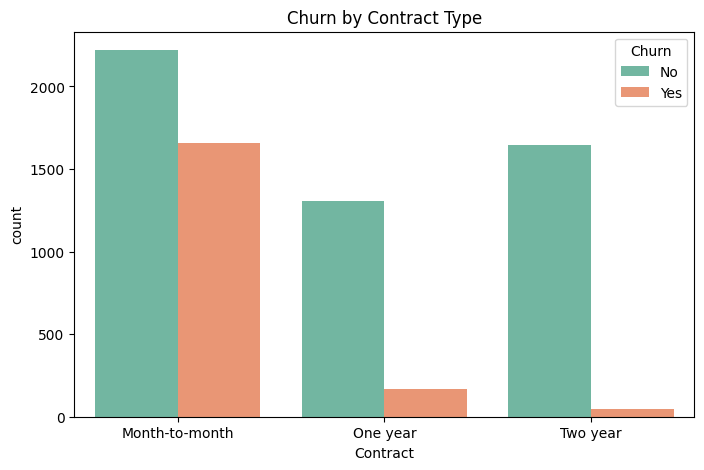

In [309]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.show()

Month-to-month: Huge Churn rate (The orange "Yes" bar is very high).

Two year: Almost zero Churn.

sceams like Contract duration is likely the strongest predictor of churn.

# Correlation Heatmap

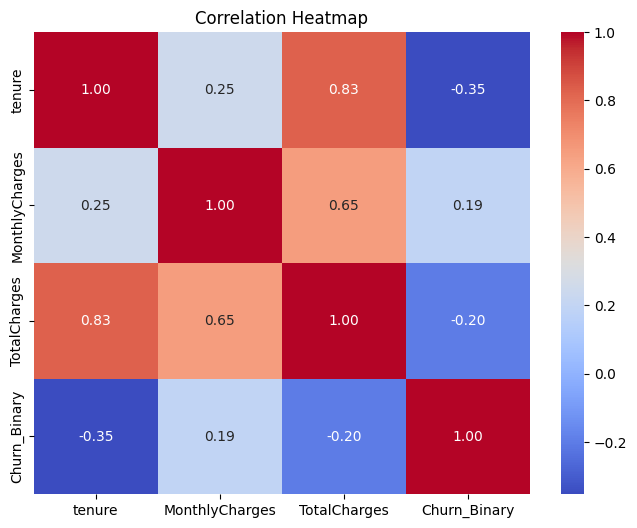

In [310]:
# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation is 0.83 (Very High) in Tenure annd TotalCharges. This because, the longer you stay, the more you pay total.


# Tenure vs Churn (Box Plot)

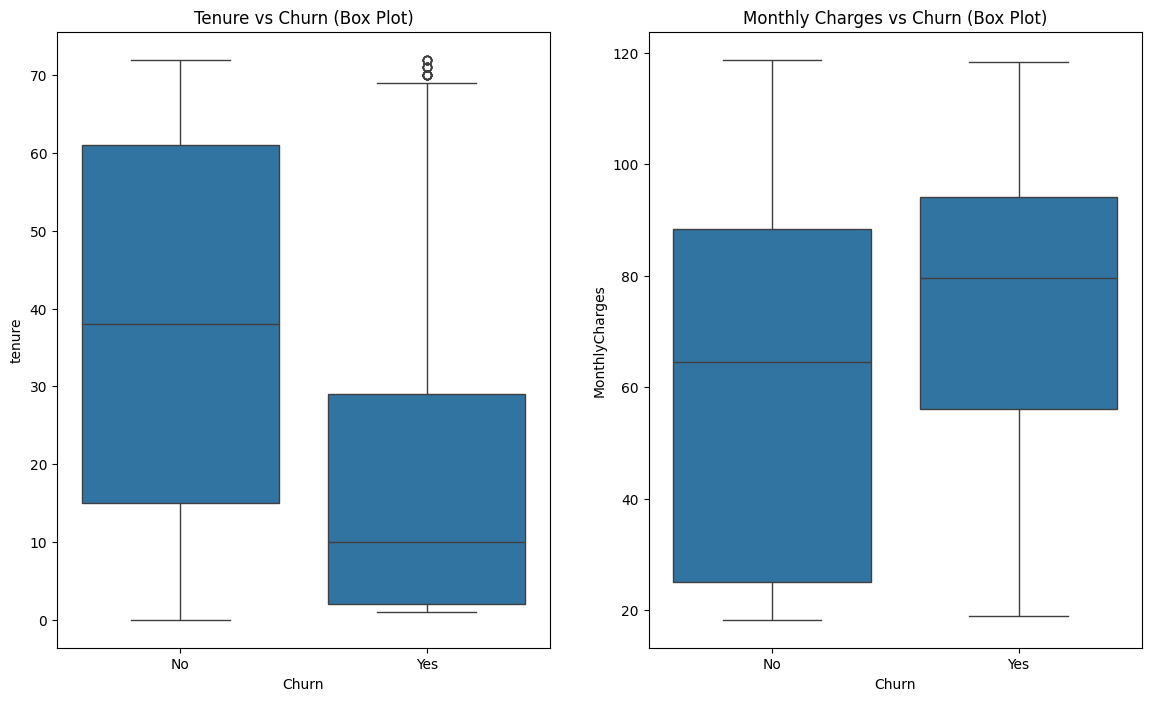

In [311]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn (Box Plot)')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn (Box Plot)')
plt.show()

churn and tenure: 
in churn = "Yes" as we can see the median line is in around 10 month, which means most people who leave so early are " sign up and try it so few months and then leave".

in churn = "No" the box fixed at much higher and tailer and the meadian is likely around 38 - 40 months, meaning "Loyal customers tend to have been with the company for years".

in concluation , The highest risk of churn occurs during the first year of the contract. If a customer stays beyond the first 12-18 months, they are significantly less likely to leave. This suggests the company should focus its retention strategies on new customers."

# Churn by Internet Service Type

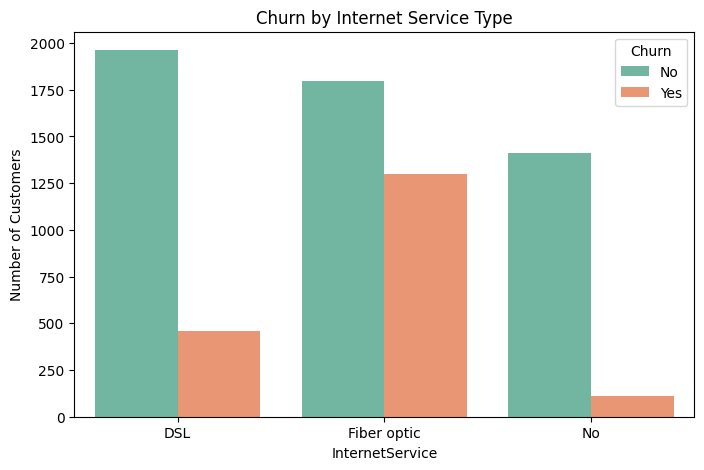

In [312]:
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

Fiber Optic: we can see a very high Orange bar ("Yes"). Meaning customers with Fiber Optic internet have a surprisingly high churn rate nearly as high as the retention rate.

DSL: The Orange bar ("Yes") is much smaller than the Green bar ("No"). DSL customers are more stable.

No (No Internet Service): The Orange bar is tiny. These customers almost never leave.

Since Fiber Optic is typically a high-margin service, this high churn suggests a problem with either pricing sensitivity or service quality for high-tier customers. The company should investigate technical support tickets or price competitiveness specifically for the Fiber Optic segment."

# Churn by Payment Method

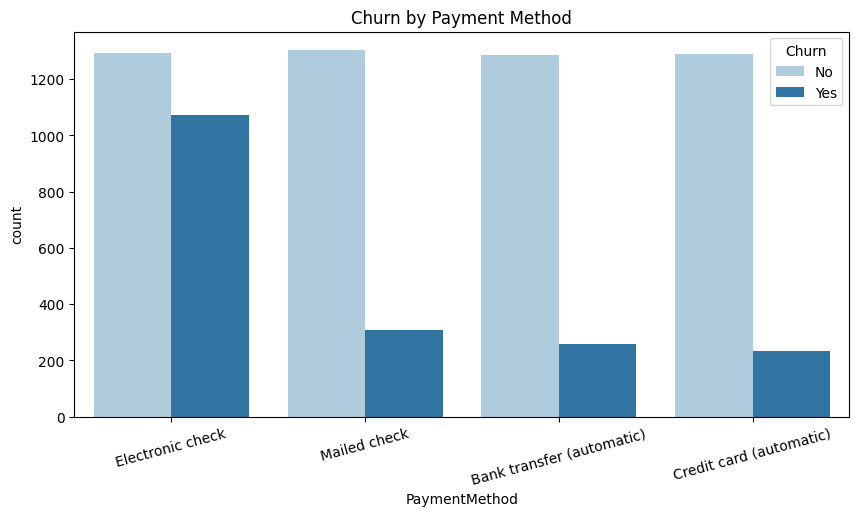

In [313]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Paired')
plt.title('Churn by Payment Method')
plt.xticks(rotation=15)
plt.show()

Electronic Check: This category will stand out immediately. The "Yes" (Orange) bar is extremely high—likely the highest churn count of all payment methods. In fact, churn here is often higher than retention.

Mailed Check, Bank Transfer, Credit Card: These three methods look very different. The "No" (Green) bars are much taller than the "Yes" (Orange) bars.

Automatic vs. Manual: The "Automatic" methods (Bank Transfer, Credit Card) have the lowest churn rates.

in Conclusion, we can see an strong correlation between automated billing and customer loyalty. Customers who have to manually interact with the billing process (Electronic Check) are more prone to leaving. The company should consider incentivizing customers to switch to automatic payments to reduce churn.
e.g., offering a small discount for Auto-Pay

# Churn by Senior Citizen Status

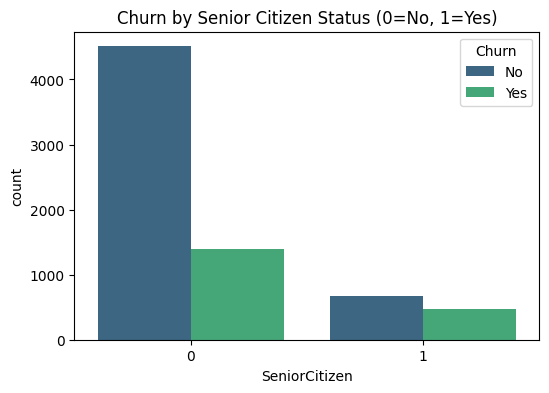

In [314]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Senior Citizen Status (0=No, 1=Yes)')
plt.show()

Non-Seniors (0): The vast majority of customers are here. The "No" bar is huge, and the "Yes" bar is much smaller. They have a lower churn ratio.

Seniors (1): The total number of seniors is small (the bars are short). However, if you look closely at the ratio, the "Yes" (Orange) bar is nearly half the height of the "No" (Purple) bar.

Comparison: Seniors have a much higher percentage of churn compared to younger people.

in Conclusion, The company is struggling to retain older customers. This could be due to complex technology, lack of tailored support or pricing issues. A targeted 'Senior Support Program' or simplified billing might help reduce churn in this high-risk demographic."